<a href="https://colab.research.google.com/github/SamuelJordanTK/Deep-Learning-Assignment-1-BTech-AI-DS/blob/main/Samuel_2231173_AI%26DS_DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEP LEARNING ASSIGNMENT 1**

Name: SAMUEL JORDAN TATCHUM

Roll No: 2231173

Course: B.Tech AI&DS

Semester: 6

## **7. Write a program to compare the performance of SGD, Adam, and RMSprop optimizers on a given dataset.**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with SGD optimizer:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


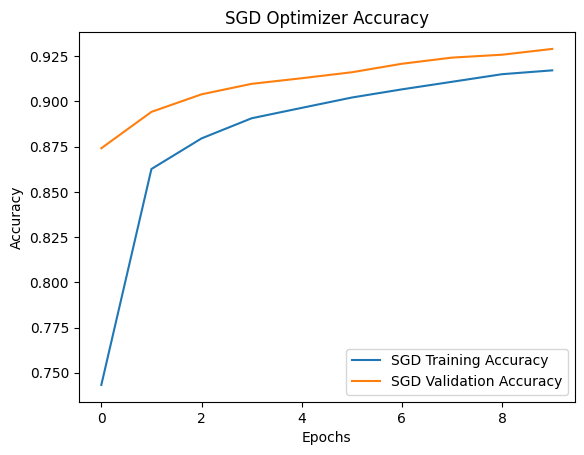


Training with RMSprop optimizer:


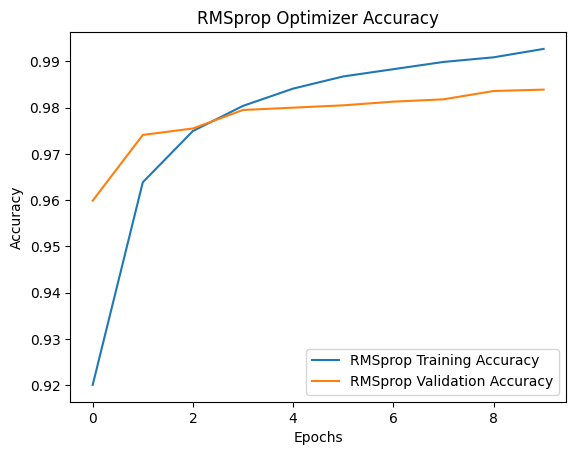


Training with Adam optimizer:


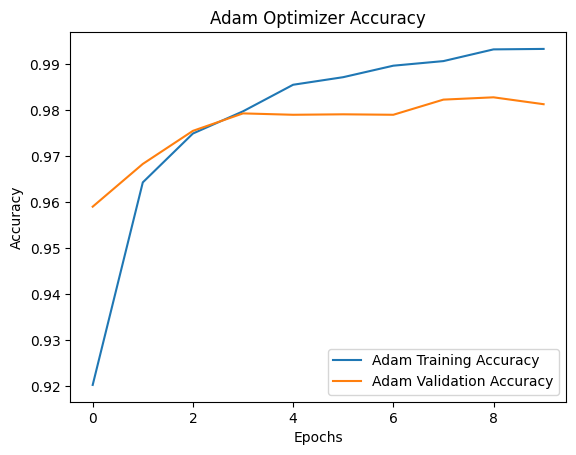


Comparison of Optimizer Performance:
SGD: {'Test Accuracy': 0.9290000200271606}
RMSprop: {'Test Accuracy': 0.9839000105857849}
Adam: {'Test Accuracy': 0.9812999963760376}


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model architecture
def create_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

# List of optimizers to compare
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001)
}

# Train and evaluate the model with each optimizer
results = {}
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer:")

    # Create and compile the model
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        batch_size=128,
                        verbose=0)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[name] = {"Test Accuracy": test_accuracy}

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label=f'{name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')
    plt.title(f'{name} Optimizer Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print the results for comparison
print("\nComparison of Optimizer Performance:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")


## Explanation of Our Code:
Here are the steps used to compare the performance of the given optimizer on the choosen dataset(MNIST dataset)

**1. Load the Dataset:**

- We used the MNIST dataset which is loaded using mnist.load_data() from TensorFlow.

- The dataset is preprocessed by reshaping and normalizing the input data.


**2. Model Creation:**

A simple neural network model is defined with two dense layers, with the hidden layer using the RELU activation function and the Softmax activation function for the output layer.

**3. Optimizers:**

The program compares three optimizers: SGD, RMSprop, and Adam.
- **Stochastic Gradient Descent (SGD)**: is a variant of gradient descent that updates model parameters using a randomly selected subset of the training data (mini-batch) rather than the entire dataset.
- **RMSprop (Root Mean Square Propagation):** it divides the learning rate by an exponentially decaying average of squared gradients. This helps control the step size and prevents oscillations during optimization.
- **Adam (Adaptive Moment Estimation):** it combines the benefits of RMSprop and momentum optimization. It adapts the learning rate for each parameter based on the first moment (mean) and second moment (variance) of the gradients.


**4. Training and Evaluation:**

For each optimizer:

- The model is compiled with the respective optimizer.

- The model is trained for 10 epochs.

- The test accuracy is evaluated and stored in a dictionary.

- Training and validation accuracy plots are generated for each optimizer.

**5. Results:**

The test accuracies for each optimizer are printed for comparison.

**Output**

We got the following performances for each optimizer:

SGD: {'Test Accuracy': 0.9290000200271606}

RMSprop: {'Test Accuracy': 0.9839000105857849}

Adam: {'Test Accuracy': 0.9812999963760376}

**Interpretation of the Output**

The output shows the test accuracy achieved by each optimizer after training a neural network model on the MNIST dataset for 10 epochs. Here's a breakdown of the results:

#### **SGD (Stochastic Gradient Descent):**

**Test Accuracy:** Approximately 92.9%

**Observation:** SGD achieved the lowest test accuracy among the three optimizers. This is expected because SGD can be slower to converge and might not adapt as well to the changing gradient landscape compared to adaptive optimizers like RMSprop and Adam.

#### **RMSprop:**

**Test Accuracy:** Approximately 98.39%

**Observation:** RMSprop achieved the highest test accuracy. This is because RMSprop adapts the learning rate for each parameter based on the magnitude of the gradient, which helps in stabilizing the updates and preventing overshooting. This makes it particularly effective for datasets like MNIST where the gradient landscape can be complex.

#### **Adam:**

**Test Accuracy:** Approximately 98.13%

**Observation:** Adam also performed very well, achieving a high test accuracy close to RMSprop. Adam combines the benefits of RMSprop (adaptive learning rate) with momentum, which helps in escaping local minima and stabilizing the updates. However, it slightly underperformed compared to RMSprop in this case.

## **8. Implement a neural network for binary classification and test different activation functions like ReLU, Sigmoid, and Tanh.**



Training with ReLU activation:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Sigmoid activation:

Training with Tanh activation:
ReLU Final Training Accuracy: 1.0000
Sigmoid Final Training Accuracy: 0.9846
Tanh Final Training Accuracy: 0.9934


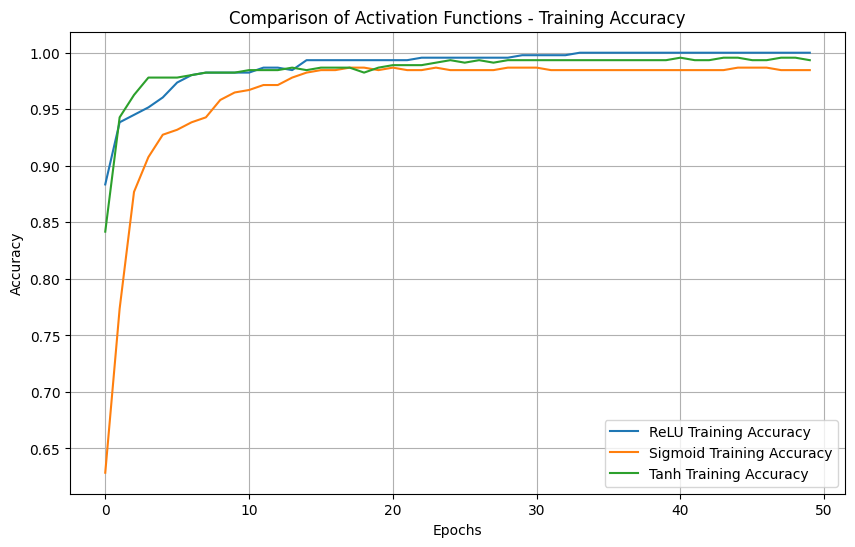

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define activation functions to compare
activation_functions = {
    "ReLU": tf.nn.relu,
    "Sigmoid": tf.nn.sigmoid,
    "Tanh": tf.nn.tanh
}

# Define the model architecture
def create_model(activation):
    model = Sequential([
        Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize dictionary to store training accuracy results for plotting
training_accuracies = {}

# Train and evaluate the model with each activation function
for name, activation in activation_functions.items():
    print(f"\nTraining with {name} activation:")

    # Create and compile the model
    model = create_model(activation)

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=32,
                        verbose=0)

    # Store training accuracy for plotting
    training_accuracies[name] = history.history['accuracy']

# Plot training accuracy of all activation functions on a single graph
plt.figure(figsize=(10, 6))
for name in activation_functions.keys():
    plt.plot(training_accuracies[name], label=f'{name} Training Accuracy')
    print(f"{name} Final Training Accuracy: {training_accuracies[name][-1]:.4f}")

plt.title('Comparison of Activation Functions - Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show();


## **9. Implement a neural network to solve a multi-class classification problem and evaluate different weight initialization techniques.**


Training with GlorotUniform weight initialization:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with HeNormal weight initialization:

Training with RandomNormal weight initialization:


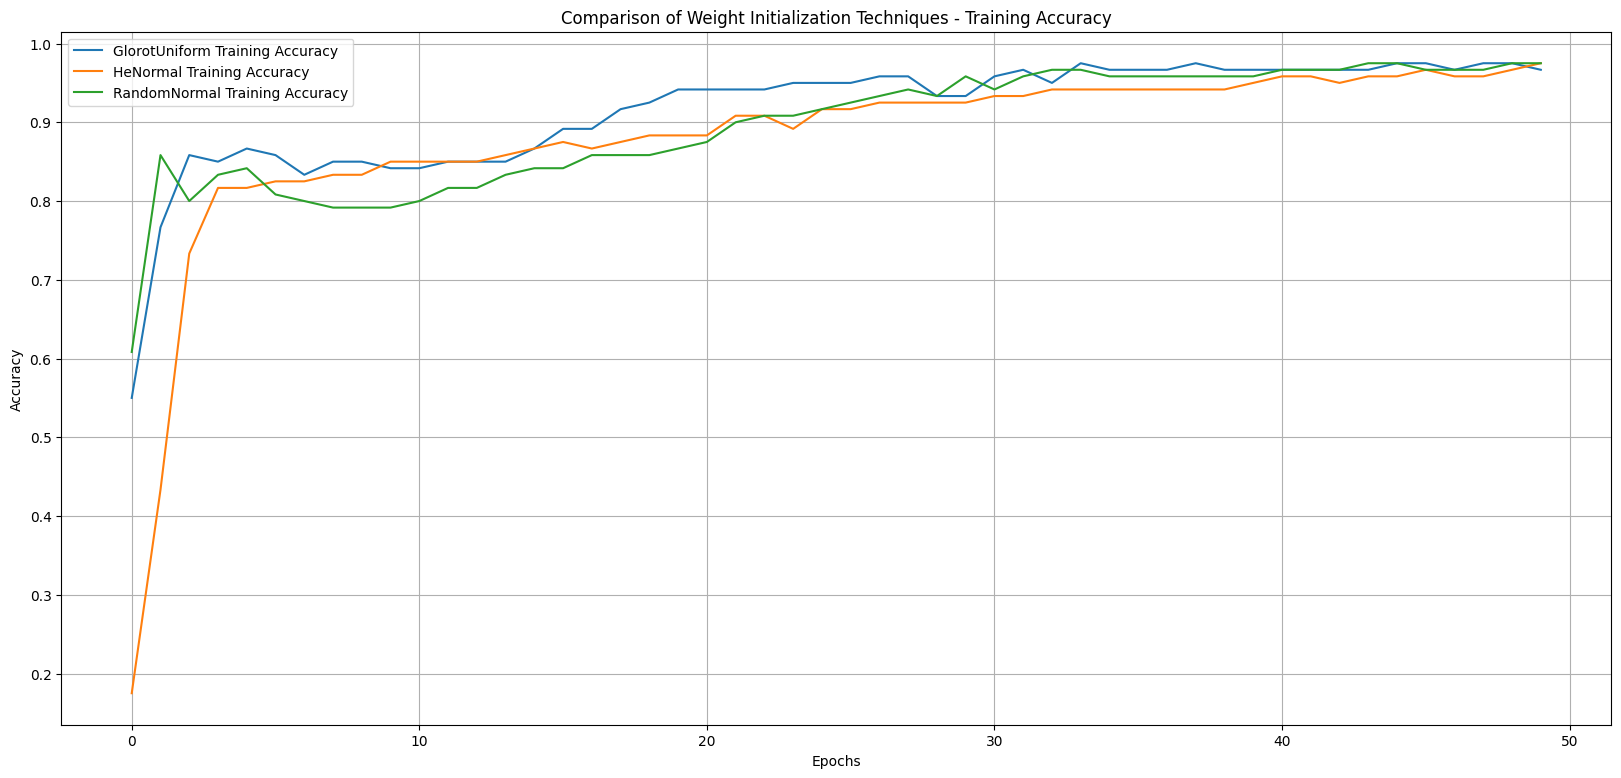


Comparison of Weight Initialization Techniques:
GlorotUniform: Test Accuracy: 1.0000
HeNormal: Test Accuracy: 1.0000
RandomNormal: Test Accuracy: 1.0000


In [10]:
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# One-hot encode the target variable (multi-class classification)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define weight initialization techniques to compare
initializers = {
    "GlorotUniform": GlorotUniform(),
    "HeNormal": HeNormal(),
    "RandomNormal": RandomNormal(mean=0.0, stddev=0.05)
}

# Define the model architecture
def create_model(initializer):
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=initializer, input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu', kernel_initializer=initializer),
        Dense(y.shape[1], activation='softmax', kernel_initializer=initializer)  # Output layer for multi-class classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model with each weight initialization technique
results = {}
training_accuracies = {}
validation_accuracies = {}

for name, initializer in initializers.items():
    print(f"\nTraining with {name} weight initialization:")

    # Create and compile the model
    model = create_model(initializer)

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=16,
                        verbose=0)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[name] = {"Test Accuracy": test_accuracy}

    # Store training and validation accuracy for plotting
    training_accuracies[name] = history.history['accuracy']
    validation_accuracies[name] = history.history['val_accuracy']

# Plot training accuracy of all weight initializations on a single graph
plt.figure(figsize=(20, 9))
for name in initializers.keys():
    plt.plot(training_accuracies[name], label=f'{name} Training Accuracy')

plt.title('Comparison of Weight Initialization Techniques - Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print final test accuracy for each initialization technique
print("\nComparison of Weight Initialization Techniques:")
for name, metrics in results.items():
    print(f"{name}: Test Accuracy: {metrics['Test Accuracy']:.4f}")


## **10. Write a program to generate confusion matrices for different models and analyze their performance.**


Training with Logistic Regression:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



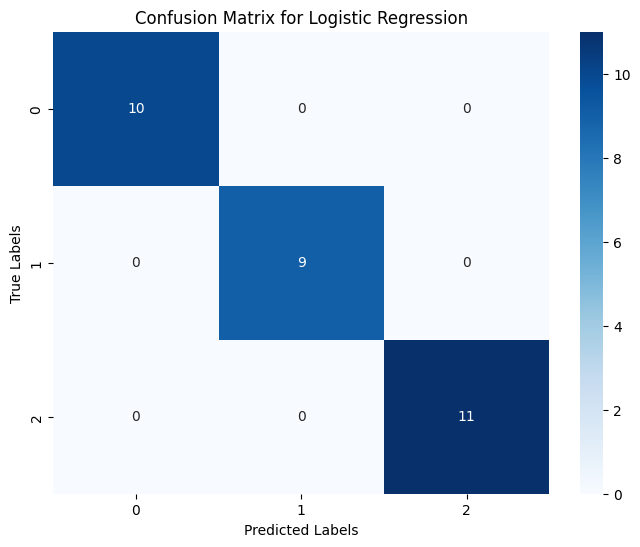


Training with Decision Tree:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



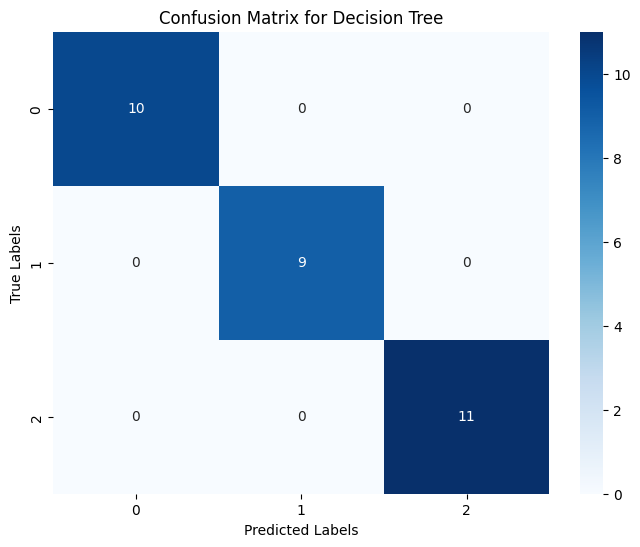


Training with Random Forest:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



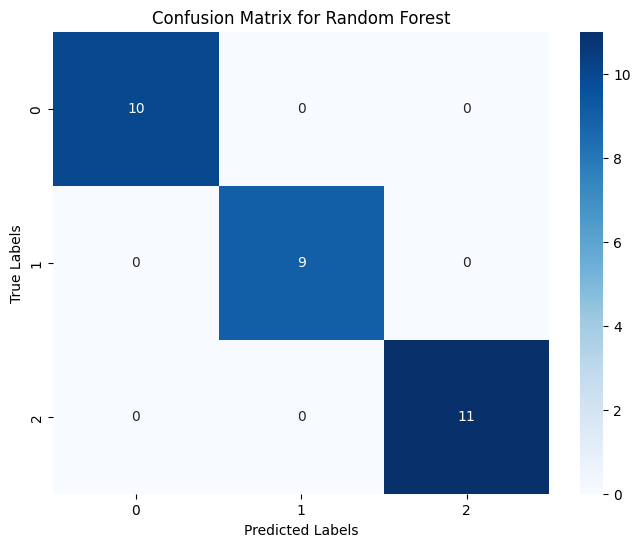


Training with SVM:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



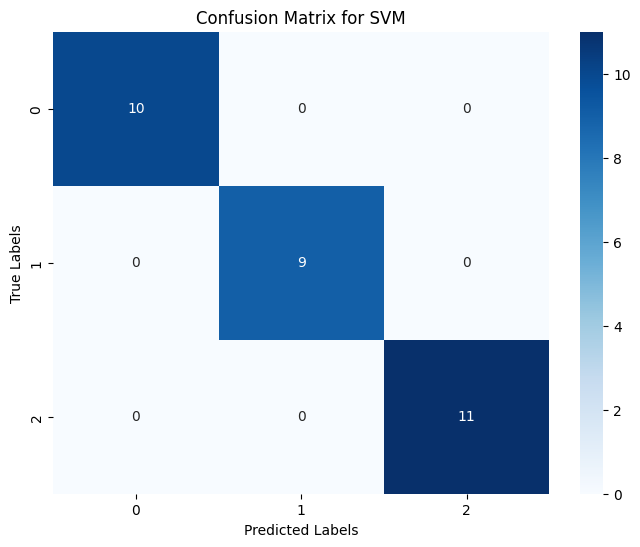


Summary of Model Performances:
Logistic Regression: Accuracy = 1.0000
Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000
SVM: Accuracy = 1.0000


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining with {name}:")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Print summary of model performances
print("\nSummary of Model Performances:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")
